# 5. Color Analysis: Predicting Vigor

This notebook explores a different aspect of the data: can we use **color metrics** as an early indicator of plant vigor?

The workflow is:
1. Load the full dataset, which includes color data (`blue_yellow_mean`, `green_red_mean`).
2. Calculate the change (delta) in color, height, and area between measurement rounds.
3. Define "high vigor" as the top 30% of plants based on area growth (`delta_area`).
4. Train two Random Forest models to predict this high vigor target:
    - Model 1: Uses only the `delta_blue_yellow_mean`.
    - Model 2: Uses only the `delta_green_red_mean`.
5. Evaluate and compare the models using ROC and Precision-Recall curves.

In [1]:
import pandas as pd
import numpy as np
import sys
import os

# Add parent directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import our custom functions
from src.data_processing import load_data, preprocess_data, calculate_deltas
from src.analysis import train_and_evaluate_vigor_model
from src.visualization import plot_model_performance_curves

In [2]:
# Load the full, original dataset
FEATURES_PATH = '../data/5.25.2024_CBI.0010_York_Poplar_RGB.side_features.csv'
BARCODE_PATH = '../data/barcodes--5.25.2024_CBI.0010_York_Poplar.csv'
data_df, barcode_df = load_data(FEATURES_PATH, BARCODE_PATH)
merged_df = preprocess_data(data_df, barcode_df)

# Calculate the change in metrics between rounds
df_deltas = calculate_deltas(merged_df)

print(f"Calculated deltas for {len(df_deltas)} observations.")
df_deltas[['Plant Info', 'delta_area', 'delta_blue_yellow_mean', 'delta_green_red_mean']].head()

Calculated deltas for 2961 observations.


,Plant Info,delta_area,delta_blue_yellow_mean,delta_green_red_mean
582,100_BESC-1025_7,88749.0,1.266469,-0.568051
1028,100_BESC-1025_7,96050.0,-0.057516,-0.442947
1474,100_BESC-1025_7,183475.0,0.449132,0.486725
1920,100_BESC-1025_7,39630.0,-0.995764,0.080974
2366,100_BESC-1025_7,46758.0,0.445922,1.800398


In [3]:
# Train a model using the Blue-Yellow color metric
by_model_results = train_and_evaluate_vigor_model(
    df_deltas.copy(), # Use a copy to avoid modifying the original df
    feature_cols=['delta_blue_yellow_mean']
)
print("Blue-Yellow model trained. ROC AUC:", round(by_model_results['roc_auc'], 3))

# Train a model using the Green-Red color metric
gr_model_results = train_and_evaluate_vigor_model(
    df_deltas.copy(),
    feature_cols=['delta_green_red_mean']
)
print("Green-Red model trained. ROC AUC:", round(gr_model_results['roc_auc'], 3))

Blue-Yellow model trained. ROC AUC: 0.568
Green-Red model trained. ROC AUC: 0.571


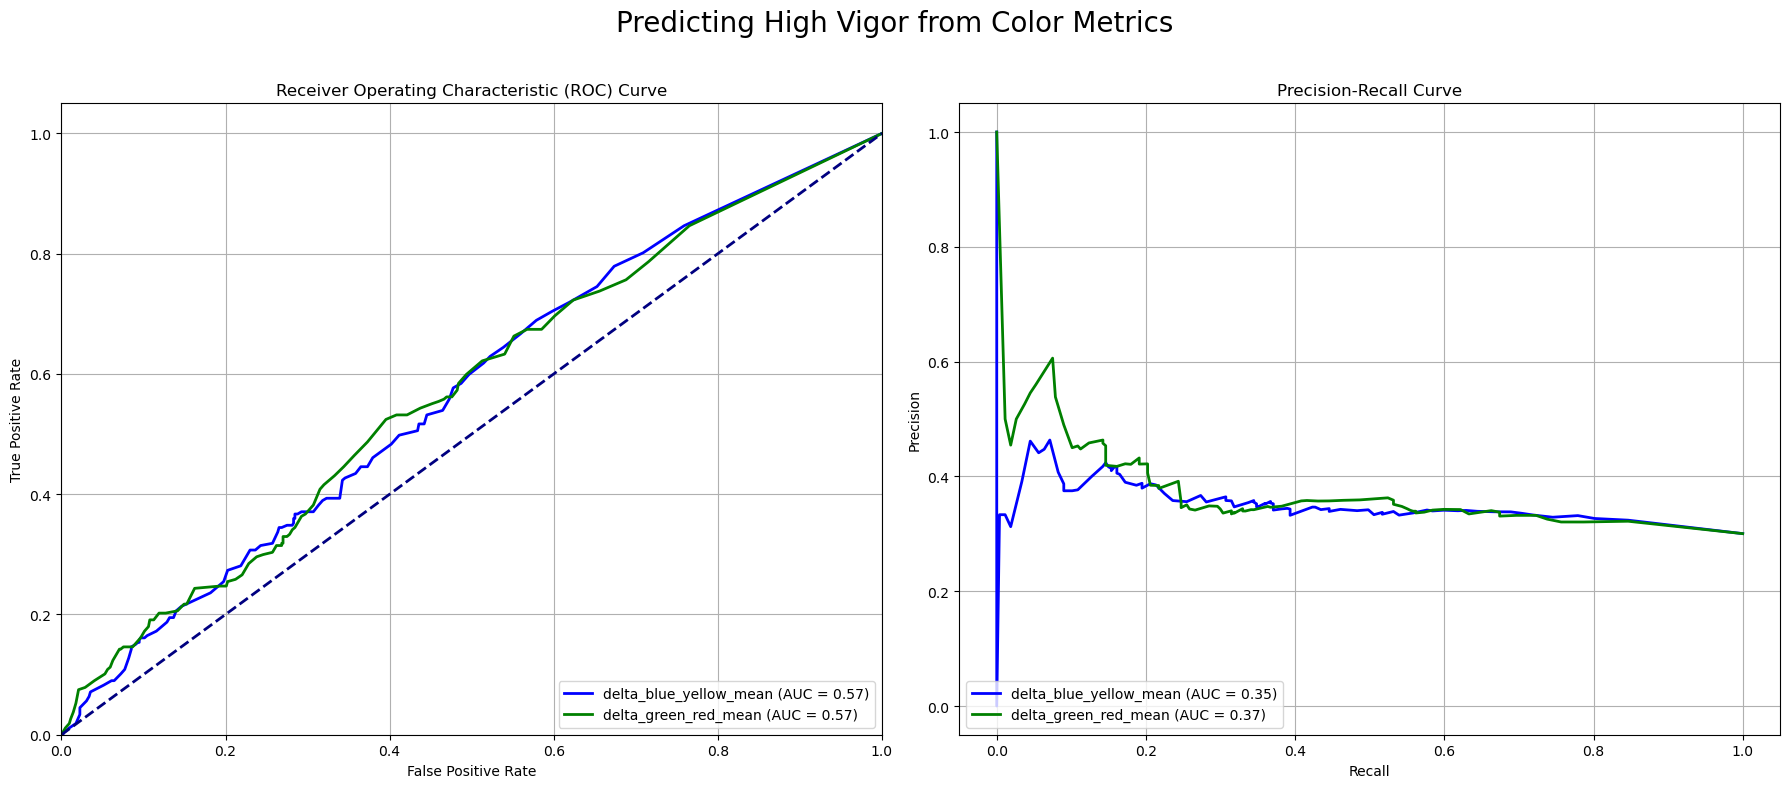

In [4]:
# Plot the performance curves for both models
plot_model_performance_curves([by_model_results, gr_model_results])

### Conclusion

The ROC and Precision-Recall curves show the performance of each color metric in predicting high-vigor plants. The Area Under the Curve (AUC) provides a single number to compare them.

Based on the AUC scores, we can conclude which color feature is the more powerful and reliable early indicator of plant growth potential. This result complements our primary analyses of growth patterns and magnitude.